<p style="text-align: center; font-size: 30px; font-weight: bold;"> Wandb 튜토리얼 </p>
<p><ul style="list-style: none; text-align: right;"><li>2022.02.08.</li><li>Kangsan Lee</li></ul></p>

- 테스트 환경
 - Python 3.8.12


- 사용 모듈
  - 내장 모듈
    - os, time, re, datetime
  - 필수 모듈
    - wandb=0.12.10
    - numpy=1.21.0
    - matplotlib=3.4.2
  - 기타 모듈
    - Pillow=8.2.0
    - pytz=2021.1
    - moviepy=1.0.3
    - imageio=2.9.0
    - plotly=5.5.0
    - tqdm=4.61.2

# 첫 시작

## Wandb 설치

```shell
>> pip install wandb
```

In [ ]:
pip install wandb

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 143 kB 49.4 MB/s 
     |████████████████████████████████| 180 kB 42.0 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=16275d629fe425dcd7defec8c0f57f1c1ad75648b5bbf1776427e54e779aafe4
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


## 로그인

In [ ]:
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## 테스트

In [ ]:
wandb.init()
wandb.log({'loss': 0.5})
wandb.finish()

wandb: Currently logged in as: tkddn2075 (use `wandb login --relogin` to force relogin)


loss,▁
loss,0.5


# Wandb 기능

## 간단한 예제

In [5]:
import numpy as np

wandb.init(project='Tutorial-Simple', name='exp 2-1')
for i in np.linspace(1, 0, 100):
    wandb.log({'loss': i + np.random.rand()*i})
wandb.finish()

loss,█▇▇▅█▇██▆▇▇▅▄▇▅▅▆▄▆▅▄▄▃▄▄▄▄▃▃▃▃▃▂▂▂▂▁▂▁▁
loss,0.0


## 기본 함수들 (detailed)

### wandb.init
- https://docs.wandb.ai/ref/python/init

```python
wandb.init(
    job_type: Optional[str] = None,
    dir=None,
    config: Union[Dict, str, None] = None,
    project: Optional[str] = None,
    entity: Optional[str] = None,
    reinit: bool = None,
    tags: Optional[Sequence] = None,
    group: Optional[str] = None,
    name: Optional[str] = None,
    notes: Optional[str] = None,
    magic: Union[dict, str, bool] = None,
    config_exclude_keys=None,
    config_include_keys=None,
    anonymous: Optional[str] = None,
    mode: Optional[str] = None,
    allow_val_change: Optional[bool] = None,
    resume: Optional[Union[bool, str]] = None,
    force: Optional[bool] = None,
    tensorboard=None,
    sync_tensorboard=None,
    monitor_gym=None,
    save_code=None,
    id=None,
    settings: Union[Settings, Dict[str, Any], None] = None
) -> Union[Run, RunDisabled, None]
```


### wandb.log
- https://docs.wandb.ai/ref/python/log

```python
wandb.log(
    data: Dict[str, Any],
    step: int = None,
    commit: bool = None,
    sync: bool = None
) -> None
```

### wandb.finish
- https://docs.wandb.ai/ref/python/finish)

```python
wandb.finish(
    exit_code: int = None,
    quiet: bool = None
) -> None
```

In [9]:
for exp_i in range(5):
    # config  중요
    config = {
        'first_value': np.random.randint(2, 10), 
        'last_value': np.random.rand()/10, 
        'steps': 100,
        'dummy': 7777
    }

    wandb.init(
        dir='./logs',
        config=config,
        project='Tutorial-Simple',
        entity='kangsan0420',
    #     reinit=None,
        tags=['tutorial', 'second'],
        group='exp 2-2',
        name=str(exp_i),
        notes='두 번째 예제: 랜덤 감소',
        config_exclude_keys='dummy',
    #     config_include_keys=None,
    #     mode=None,
    #     resume=None,
        save_code=True,
    #     id=None
    )

    for i in np.linspace(config['first_value'], config['last_value'], config['steps']):
        wandb.log({'loss': i + np.random.rand()*i})
    wandb.finish(quiet=True)

wandb: WARNING Path ./logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path ./logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path ./logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path ./logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path ./logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path ./logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path ./logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path ./logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path ./logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path ./logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path ./logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path ./logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path ./logs/wandb/ wasn't

Problem at: <ipython-input-9-9cfb256a54a2> 25 <module>


wandb: ERROR Abnormal program exit


Exception: ignored

## 데이터 타입
- https://docs.wandb.ai/ref/python/data-types

In [ ]:
values = [(1+np.random.rand())*i for i in np.linspace(
    config['first_value'], config['last_value'], config['steps']
)]

log_dict = dict()

### Table

In [ ]:
table = wandb.Table(data=[[i,j] for i,j in enumerate(values)], columns=['step', 'loss'])
log_dict['table'] = table

### Charts

In [ ]:
log_dict['line_plot'] = wandb.plot.line(table, 'step', 'loss', title='line plot')
log_dict['scatter_plot'] = wandb.plot.scatter(table, 'step', 'loss', title='scatter plot')
log_dict['bar_plot'] = wandb.plot.bar(table, 'step', 'loss', title='bar plot')

hist_table = wandb.Table(data=[[x] for x in values], columns=['loss'])
log_dict['histogram_plot'] = wandb.plot.histogram(hist_table, 'loss', title='histogram plot')

### Matplotlib Plot
```shell
>> pip install plotly
```

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4))
plt.plot(values)
plt.title('matplotlib plot')
log_dict['matplotlib_plot'] = fig
plt.close()

### Image

In [ ]:
!curl https://i.imgur.com/srHJWXo.jpeg --output test_img.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  370k  100  370k    0     0   338k      0  0:00:01  0:00:01 --:--:--  338k


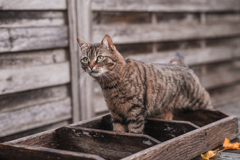

In [ ]:
from PIL import Image
img = Image.open('test_img.jpg')
img = img.resize((l//8 for l in img.size))
display(img)

log_dict['img'] = wandb.Image(img, caption='example image')

### Video

```shell
>> pip install moviepy imageio
```

In [ ]:
video = np.stack([np.clip(np.array(img).astype(float) + x*10, 0, 255) for x in values], axis=0).astype(np.uint8)
video.shape

(100, 160, 240, 3)

In [ ]:
# (time, channel, height, width)
log_dict["video"] = wandb.Video(video.transpose(0, 3, 1, 2), fps=25, format="gif")

### Mixed Table

In [ ]:
mixed_table = wandb.Table(data=[], columns=['noise_img', 'loss', 'random_graph'])

for i in range(100):
    fig = plt.figure(figsize=(6, 4))
    plt.plot(np.random.rand(50))
    plt.title('matplotlib plot')
    mixed_table.add_data(wandb.Image(video[i]), values[i], wandb.Image(fig))
    plt.close()
    
log_dict['mixed_table'] = mixed_table

In [ ]:
import datetime, pytz, re
now = datetime.datetime.now(tz=pytz.timezone('Asia/Seoul')).strftime('%Y%m%d_%H%M%S_%f')

try:
    wandb.init(
        project='Tutorial-Simple',
        name='exp 2-3',
        id=now
    )

    wandb.log(log_dict)
finally:
    wandb.finish()

### Etc
https://docs.wandb.ai/ref/python/data-types
- Audio
- BoundingBox
- Html
- ImageMask
- Molecule
- Object3D
- Plotly
- ...

## Wandb Run

In [ ]:
api = wandb.Api()
run = api.run("kangsan0420/Tutorial-Simple/%s" % now)

In [ ]:
run

<Run kangsan0420/Tutorial-Simple/20220208_140056_137520 (finished)>

In [ ]:
runs = api.runs("kangsan0420/Tutorial-Simple")
ids = [run.id for run in runs]
ids

['20220208_140056_137520',
 'y49bx13u',
 '1jnpkqa2',
 '3b6q0gvp',
 '27jjecsr',
 '1ieoj3qp',
 '2rgno0b4']

In [ ]:
print('config:\n{}\n'.format(runs[2].config))
print('summary:\n{}\n'.format(runs[2].summary))
print('history():')
display(runs[2].history())

config:
{'steps': 100, 'last_value': 0.006850925178326739, 'first_value': 6}

summary:
{'_step': 99, '_wandb': {'runtime': 3}, '_runtime': 5, '_timestamp': 1644296424, 'loss': 0.008933206643910927}

history():


,_step,loss,_runtime,_timestamp
0,0,10.943006,5,1644296424
1,1,6.914847,5,1644296424
2,2,11.331099,5,1644296424
3,3,9.506231,5,1644296424
4,4,6.239559,5,1644296424
...,...,...,...,...
95,95,0.255318,5,1644296424
96,96,0.269435,5,1644296424
97,97,0.194170,5,1644296424
98,98,0.091600,5,1644296424


# AI를 위한 Wandb

## Summary에 최대 / 최소값 표시

In [ ]:
%%wandb # IPython cell magic command

import time

config = {
    'first_value': np.random.randint(2, 10), 
    'last_value': np.random.rand()/10, 
    'steps': np.random.randint(50, 100)
}

def train(config):
    for i in np.linspace(config['first_value'], config['last_value'], config['steps']):
        wandb.log({
            'train/loss': (1 + i)*np.random.rand(),
            'val/loss': (1 + i)*np.random.rand(),
            'train/acc': 1 - (1 + i)*np.random.rand()/config['first_value'],
            'val/acc': 1 - (1 + i)*np.random.rand()/config['first_value'],
        })
        time.sleep(0.5)

try:
    wandb.init(
        config=config,
        project='Tutorial-Simple',
        name='exp 3-1',
    )
    wandb.define_metric('train/loss', summary='min')
    wandb.define_metric('val/loss', summary='min')
    wandb.define_metric('train/acc', summary='max')
    wandb.define_metric('val/acc', summary='max')

    train(config)
finally:
    wandb_id = wandb.run.id
    wandb.finish(quiet=True)

In [ ]:
api = wandb.Api()
run = api.run("kangsan0420/Tutorial-Simple/%s" % wandb_id)

import json
print(json.dumps(run.summary._json_dict, indent=2))

{
  "val/acc": {
    "max": 0.9803096394191748
  },
  "_runtime": 41,
  "val/loss": {
    "min": 0.011948811212991082
  },
  "train/acc": {
    "max": 0.9844839218089186
  },
  "_timestamp": 1644296521,
  "train/loss": {
    "min": 0.07763056095617532
  },
  "_step": 75,
  "_wandb": {
    "runtime": 41
  }
}


## Sweep

- Reset kernel
- [Environment variables](https://docs.wandb.ai/guides/track/advanced/environment-variables)

In [ ]:
import os
os._exit(00)

### 홈페이지에서 수동 Sweep 생성
```shell
>> pip install tqdm
```

In [ ]:
import os
os.environ['WANDB_SILENT'] = 'true'

import wandb
import numpy as np
from tqdm.auto import tqdm

def train(config):
    for i in np.linspace(config['first_value'], config['last_value'], 20):
        wandb.log({
            'train/loss': i + np.random.rand()*config['random_scale'],
            'val/loss': i + np.random.rand()*config['random_scale'],
            'train/acc': (config['first_value'] - i + np.random.rand()*config['random_scale'])/config['last_value'],
            'val/acc': (config['first_value'] - i + np.random.rand()*config['random_scale'])/config['last_value'],
        })

for i in tqdm(range(25)):
    try:
        config = {
            'first_value': np.random.randint(2, 10), 
            'last_value': np.random.rand(), 
            'random_scale': np.random.rand()/10
        }

        wandb.init(
            config=config,
            project='Tutorial-Simple',
            group='exp 3-2',
            name=str(i),
        )
        wandb.define_metric('train/loss', summary='min')
        wandb.define_metric('val/loss', summary='min')
        wandb.define_metric('train/acc', summary='max')
        wandb.define_metric('val/acc', summary='max')

        train(config)
    finally:
        wandb_id = wandb.run.id
        wandb.finish(quiet=True)

  0%|          | 0/25 [00:00<?, ?it/s]

2022-02-08 05:02:42.207905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-08 05:02:42.207942: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### 코드로 자동 Sweep 생성
- [Sweep configuration](https://docs.wandb.ai/guides/sweeps/configuration)

In [ ]:
def train(config):
    for i in np.linspace(config['first_value'], config['last_value'], 20):
        wandb.log({
            'train/loss': i + np.random.rand()*config['random_scale'],
            'val/loss': i + np.random.rand()*config['random_scale'],
            'train/acc': (config['first_value'] - i + np.random.rand()*config['random_scale'])/config['last_value'],
            'val/acc': (config['first_value'] - i + np.random.rand()*config['random_scale'])/config['last_value'],
        })
        
sweep_config = {
    'name' : 'bayes-sweep',
    'method' : 'bayes',
    'metric': {'name': 'val/loss.min', 'goal': 'minimize'},
    'parameters' : {
        'first_value' : {
            'values' : [1, 2, 5]
        },
        'last_value' :{
            'min': 0.1,
            'max': 1.
        },
        'random_scale' :{
            'distribution': 'log_uniform',
            'min': 0.01,
            'max': 0.1
        }
    }
}
def train_sweep():
    with wandb.init(config=wandb.config,
                    project='Tutorial-Simple', group='exp 3-3') as run:
        
        wandb.define_metric('train/loss', summary='min')
        wandb.define_metric('val/loss', summary='min')
        wandb.define_metric('train/acc', summary='max')
        wandb.define_metric('val/acc', summary='max')
        
        train(run.config)
    pbar.update(1)
    
count = 25
pbar = tqdm(total=count)
sweep_id = wandb.sweep(sweep_config, project='Tutorial-Simple')
wandb.agent(sweep_id, function=train_sweep, count=count)
pbar.close()

  0%|          | 0/25 [00:00<?, ?it/s]

Create sweep with ID: ms1reu11
Sweep URL: https://wandb.ai/kangsan0420/Tutorial-Simple/sweeps/ms1reu11


# 로컬에서 사용 (self-hosting)
- https://docs.wandb.ai/guides/self-hosted
- 인터넷에 접속할 수 없을 때
- 인터넷에 접속은 되지만 wandb.ai 사이트 접근이 불가할 때
- [wandb/local 도커 이미지](https://hub.docker.com/r/wandb/local) 필요 (`docker pull wandb/local`)

```bash
>> wandb local
>> # 또는
>> docker run --rm -d -v wandb:/vol -p 8080:8080 --name wandb-local wandb/local
```

```bash
wandb login --host=http://IP:PORT # default: https://api.wandb.ai
```

## Troubleshooting

- "Unable to create account, contact your administrator" 에러 [→ Link](https://github.com/wandb/local/issues/44)

```bash
docker exec -it wandb-local bash
vi /vol/env/users.htpasswd # Remove the line with local@wandb.com in it
/usr/local/bin/local password user@wandb.com
```

In [ ]:
import wandb
import numpy as np

wandb.init(project='local', name='exp 4')
for i in np.linspace(1, 0, 100):
    wandb.log({'loss': i + np.random.rand()*i})
wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: user (use `wandb login --relogin` to force relogin)
2022-02-08 04:53:13.008122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-08 04:53:13.008159: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


loss,▅█▆▇▇▆▇▇▇▄▅▆▅▅▄▄▅▅▄▄▄▄▄▃▃▃▂▂▂▃▂▃▂▂▂▂▁▁▁▁
loss,0.0


### 정리

```bash
>> docker stop wandb-local
>> docker volume rm wandb
```

# Artifact: Data & Model Versioning

<img src="https://2807047907-files.gitbook.io/~/files/v0/b/gitbook-28427.appspot.com/o/assets%2F-Lqya5RvLedGEWPhtkjU%2F-M94QAXA-oJmE6q07_iT%2F-M94QJCXLeePzH1p_fW1%2Fsimple%20artifact%20diagram%202.png?alt=media&token=94bc438a-bd3b-414d-a4e4-aa4f6f359f21">

## 데이터셋 파일 저장

In [ ]:
import wandb
import os

# Initialize a new W&B run to track this job
run = wandb.init(project="Tutorial-Simple", job_type="dataset-creation")

# Create a sample dataset to log as an artifact
f = open('my-dataset.txt', 'w')
f.write('Imagine this is a big dataset.')
f.close()

# Create a new artifact, which is a sample dataset
dataset = wandb.Artifact('my-dataset', type='dataset')
# Add files to the artifact, in this case a simple text file
dataset.add_file('my-dataset.txt')
# Log the artifact to save it as an output of this run
run.log_artifact(dataset)

wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: kangsan0420 (use `wandb login --relogin` to force relogin)
2022-02-08 05:40:09.658824: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-08 05:40:09.658869: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 저장한 데이터셋 불러오기

In [ ]:
run = wandb.init(project="Tutorial-Simple", job_type="model-training")

# Pull down that dataset you logged in the last run
artifact = run.use_artifact('my-dataset:latest')
artifact_dir = artifact.download()
print(open(os.path.join(artifact_dir, 'my-dataset.txt')).read())

# Simulate tracking a model file with this simple txt
f = open('my-model.txt', 'w')
f.write('Imagine this is a model file.')
f.close()

# Save a model after training
model = wandb.Artifact('my-model', type='model')
model.add_file('my-model.txt')
run.log_artifact(model)

wandb.finish()

Imagine this is a big dataset.


## 데이터셋 업데이트

In [ ]:
# Initialize a new W&B run to track this job
run = wandb.init(project="Tutorial-Simple", job_type="dataset-creation")

# Update the dataset
f = open('my-dataset.txt', 'w')
f.write('Here is an edited dataset!')
f.close()

# Log to the same named artifact, but with updated data
artifact = wandb.Artifact('my-dataset', type='dataset')
artifact.add_file('my-dataset.txt')
run.log_artifact(artifact)

# Now you have a new artifact version logged!

wandb.finish()